In [14]:
from typing import List, Dict
from collections import Counter
import math

import matplotlib.pyplot as plt

In [15]:
def bucketize(point: float, bucket_size: float) -> float:
    """floor point to the next lower multiple of bucket_size"""
    return bucket_size * math.floor(point / bucket_size)

def make_histogram(points: List[float], bucket_size: float) -> Dict[float, int]:
    """buckets points and counts the number of points in each bucket"""
    return Counter(bucketize(point, bucket_size) for point in points)

def plot_histogram(points: List[float], bucket_size: float, title: str = ""):
    histogram = make_histogram(points, bucket_size)
    plt.bar(histogram.keys(), histogram.values(), width = bucket_size)
    plt.title(title)

In [16]:
import random
from scipy.stats import norm

uniform = [200 * random.random() - 100 for _ in range(10000)]

normal  = [200 / math.sqrt(12) * norm.ppf(random.random()) for _ in range(10000)]

In [17]:
normal

[-71.50911349329533,
 26.359575213033086,
 -22.181305329057512,
 -10.770879361585516,
 76.75038035624446,
 5.212532012959915,
 -60.10018204545273,
 12.536681759665182,
 -132.9390975316181,
 35.208988583305846,
 -45.71113507004208,
 -20.434111126666476,
 -30.933610067982194,
 -29.229475879121328,
 -136.47236119972206,
 -24.89700254100272,
 10.410101383093508,
 -75.66595955001195,
 -77.39341172478346,
 -44.42457761885103,
 -5.814455985742689,
 -0.07822977115271693,
 8.243486049996383,
 -29.714573560821606,
 -36.11787765047888,
 -13.250333184230518,
 -84.6021902932594,
 32.77615747899379,
 47.328140296420294,
 59.860472505980184,
 0.9123017287877007,
 -38.88451332771201,
 124.09419127466116,
 -71.01156572017857,
 -74.94261824692147,
 57.024197396964325,
 -73.7779319804373,
 40.32616545490381,
 1.5446160650386984,
 -74.08278467478229,
 30.116102021875534,
 -23.45499571479894,
 62.69881541694477,
 -64.45211036536935,
 -85.72783050901666,
 -27.88133484187165,
 -35.52004271384675,
 -105.72584

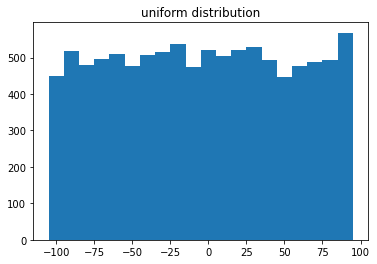

In [18]:
plot_histogram(uniform, 10, "uniform distribution")

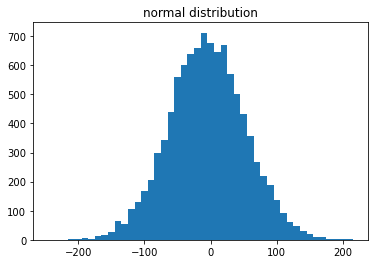

In [19]:
plot_histogram(normal, 10, "normal distribution")

(None, None)

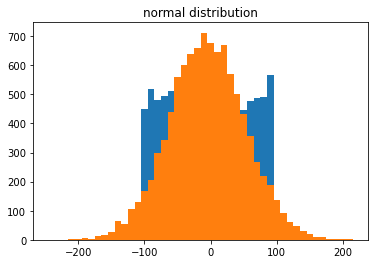

In [20]:
plot_histogram(uniform, 10, "uniform distribution"), plot_histogram(normal, 10, "normal distribution")

In [21]:
def random_normal() -> float:
    """returns a random value drawn from a standard normal distribution"""
    return norm.ppf(random.random())

In [22]:
xs  = [random_normal() for _ in range(1000)]
ys1 = [ x + random_normal() / 2 for x in xs]
ys2 = [-x + random_normal() / 2 for x in xs]

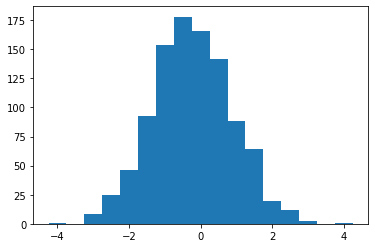

In [23]:
plot_histogram(ys1, 0.5, "")

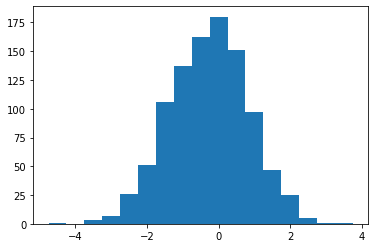

In [24]:
plot_histogram(ys2, 0.5, "")

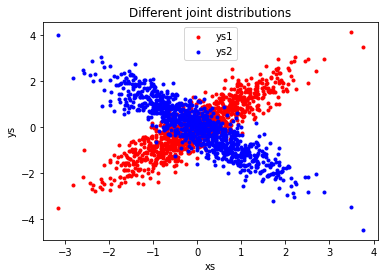

In [25]:
plt.scatter(xs, ys1, marker='.', color='red' , label='ys1')
plt.scatter(xs, ys2, marker='.', color='blue', label='ys2')
plt.xlabel('xs')
plt.ylabel('ys')
plt.legend(loc = 9)
plt.title("Different joint distributions")
plt.show()

In [26]:
from scipy.stats import pearsonr

pearsonr(xs, ys1), pearsonr(xs, ys2)

((0.8869100521855, 0.0), (-0.889021120976109, 0.0))

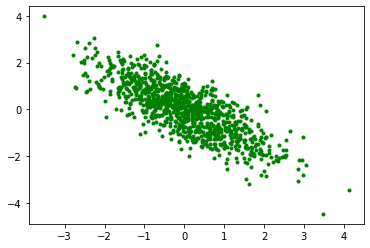

In [27]:
plt.scatter(ys1, ys2, marker='.', color='green')

In [28]:
pearsonr(ys1, ys2)

(-0.7866111274652622, 3.356901516111856e-211)

In [29]:
Vector = List[float]
Matrix = List[List[float]]

from typing import Callable

def make_matrix(num_rows: int,
                num_cols: int,
                entry_fn: Callable[[int, int], float]) -> Matrix:
    """returns a num_rows x num_cols matrix whose (i, j) entry is entry_fn(i, j)"""
    return [[entry_fn(i, j) for j in range(num_cols)] for i in range(num_rows)]

In [30]:
def identity_matrix(n: int) -> Matrix:
    return make_matrix(n, n, lambda i, j: 1 if i == j else 0)

In [31]:
identity_matrix(5)

[[1, 0, 0, 0, 0],
 [0, 1, 0, 0, 0],
 [0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0],
 [0, 0, 0, 0, 1]]

In [46]:
def correlation_matrix(data: List[Vector]) -> Matrix:
    def correlation_ij(i: int, j: int) -> float:
        return pearsonr(data[i], data[j])
    
    return make_matrix(len(data), len(data), correlation_ij)

In [63]:
corr_data = [[(2 - k) * x + 0.5 * random_normal() for x in xs] for k in range(5)]

In [64]:
correlation_matrix(corr_data)

[[(1.0, 0.0),
  (0.853327113106053, 1.5404451279402715e-284),
  (-0.08288414604955716, 0.008734833190106215),
  (-0.8553613481010699, 2.4985006542207208e-287),
  (-0.9386319200756993, 0.0)],
 [(0.853327113106053, 1.5404451279402715e-284),
  (0.9999999999999999, 0.0),
  (-0.028125292157982377, 0.37429164408159327),
  (-0.77760759045674, 2.4671431749761122e-203),
  (-0.8568678241985761, 2.0128381065814778e-289)],
 [(-0.08288414604955716, 0.008734833190106215),
  (-0.028125292157982377, 0.37429164408159327),
  (0.9999999999999999, 0.0),
  (0.07759515479190231, 0.01411173258240443),
  (0.060287621868362555, 0.0566746991658663)],
 [(-0.8553613481010699, 2.4985006542207208e-287),
  (-0.77760759045674, 2.4671431749761122e-203),
  (0.07759515479190231, 0.01411173258240443),
  (0.9999999999999999, 0.0),
  (0.8590969207712588, 1.4491225925379886e-292)],
 [(-0.9386319200756993, 0.0),
  (-0.8568678241985761, 2.0128381065814778e-289),
  (0.060287621868362555, 0.0566746991658663),
  (0.8590969207712

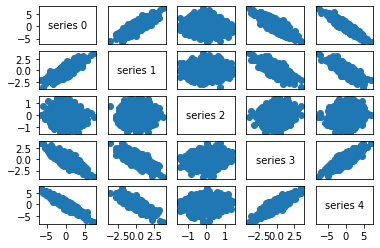

In [65]:
num_vectors = len(corr_data)
fig, ax = plt.subplots(num_vectors, num_vectors)

for i in range(num_vectors):
    for j in range(num_vectors):
        if i != j:
            ax[i][j].scatter(corr_data[j], corr_data[i])
        else:
            ax[i][j].annotate("series " + str(i), (0.5, 0.5), xycoords='axes fraction', ha="center", va="center")
            
        if i < num_vectors - 1:
            ax[i][j].xaxis.set_visible(False)
        if j > 0:
            ax[i][j].yaxis.set_visible(False)
            
        ax[-1][-1].set_xlim(ax[0][-1].get_xlim())
        ax[0][0].set_ylim(ax[0][1].get_ylim())

In [56]:
def add(v: Vector, w: Vector) -> Vector:
    assert len(v) == len(w), "summands have different lengths"
    return [v_i + w_i for v_i, w_i in zip(v, w)]

def subtract(v: Vector, w: Vector) -> Vector:
    assert len(v) == len(w), "minuend and subtrahend have different lengths"
    return [v_i - w_i for v_i, w_i in zip(v, w)]

def vector_mean(vectors: List[Vector]) -> Vector:
    n = len(vectors)
    return scalar_multiply(1 / n, vector_sum(vectors))

def de_mean(data: List[Vector]) -> List[Vector]:
    """recenters the data to have mean 0"""
    mean = vector_mean(data)
    return [subtract(vector, mean) for vector in data]

In [66]:
def dot(v: Vector, w: Vector) -> float:
    assert len(v) == len(w), "vectors have different lengths"
    
    return sum(v_i * w_i for v_i, w_i in zip(v, w))

def norm_square(v: Vector) -> float:
    return dot(v, v)

def magnitude(v: Vector) -> float:
    return math.sqrt(norm_square(v))

def direction(w: Vector) -> Vector:
    length_w = magnitude(w)
    return [w_i / length_w for w_i in w]

In [67]:
direction([3, 4])

[0.6, 0.8]

In [68]:
def scalar_multiply(c: float, v: Vector) -> Vector:
    return [c * v_i for v_i in v]

def directional_variance(data: List[Vector], w: Vector) -> float:
    w_dir = direction(w)
    return sum(dot(v, w_dir) ** 2 for v in data)

def directional_variance_gradient(data: List[Vector], w: Vector) -> Vector:
    w_dir = direction(w)
    return [sum(2 * dot(v, w_dir) * v[i] for v in data) for i in range(len(w))]

def gradient_step(theta: Vector, grad: Vector, learning_rate: float):
    return add(theta, scalar_multiply(learning_rate, grad))

import tqdm

def first_principal_component(data: List[Vector],
                              n: int = 100,
                              step_size: float = 0.1) -> Vector:
    guess = [1.0 for _ in data[0]]
    
    with tqdm.trange(n) as t:
        for _ in t:
            dv = directional_variance(data, guess)
            gradient = directional_variance_gradient(data, guess)
            guess = gradient_step(guess, gradient, step_size)
    
    return direction(guess)

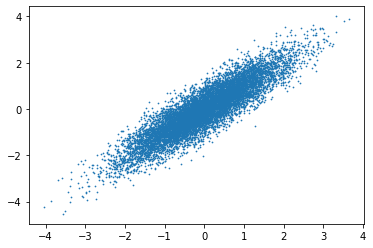

In [74]:
xu = [random_normal() for _ in range(10000)]
z  = [[x, x + 0.5 * random_normal()] for x in xu]
yu = [pt[1] for pt in z]

plt.scatter(xu, yu, s = 0.5)

In [75]:
pearsonr(xu, yu)

(0.8964009506777786, 0.0)

100%|██████████| 100/100 [00:05<00:00, 18.36it/s]


[0.663274895990044, 0.7483758496567059]


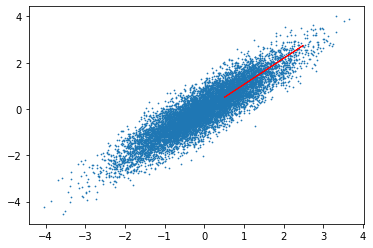

In [80]:
P1 = first_principal_component(z, 100, 0.1)
print(P1)
plt.scatter(xu, yu, s = 0.5)
plt.arrow(1/2, 1/2, 3 * P1[0], 3 * P1[1], color = 'red')

In [81]:
magnitude(P1)

1.0

In [82]:
def project(v: Vector, w: Vector) -> Vector:
    projection_length = dot(v, w)
    return scalar_multiply(projection_length, w)

def remove_projection_from_vector(v: Vector, w: Vector) -> Vector:
    return subtract(v, project(v, w))

def remove_projection(data: List[Vector], w: Vector) -> List[Vector]:
    return [remove_projection_from_vector(v, w) for v in data]

AttributeError: module 'matplotlib.pyplot' has no attribute 'set_aspect'

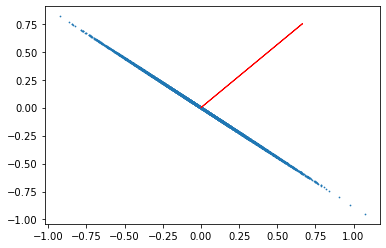

In [84]:
z_removed = remove_projection(z, P1)
x_removed = [z[0] for z in z_removed]
y_removed = [z[1] for z in z_removed]

plt.scatter(x_removed, y_removed, s = 0.5)
plt.arrow(0, 0, P1[0], P1[1], color = 'red')